In [1]:
import pandas as pd
import numpy as np 
import gzip
import pickle
import os
import matplotlib.pyplot as plt 

In [2]:
os.chdir('./iscreamedu')
category = ['CALH','CFLH','consult','CPEH','evaluation','EXT_REC','CPH']

In [211]:
for i in category:
    with gzip.open('./SAM_%s_0307.pickle'%i,'rb') as f:
        globals()['{}_0307'.format(i)] = pickle.load(f)

In [4]:
for i in category:
    with gzip.open('./SAM_%s_0912.pickle'%i,'rb') as f:
        globals()['{}_0912'.format(i)] = pickle.load(f)

In [135]:
연장회원_0307 = EXT_REC_0307[EXT_REC_0307['연장회원구분'] == 'Y']
연장회원_0912 = EXT_REC_0912[EXT_REC_0912['연장회원구분'] == 'Y']
연장회원_0307_N = EXT_REC_0307[EXT_REC_0307['연장회원구분'] == 'N']
연장회원_0912_N = EXT_REC_0912[EXT_REC_0912['연장회원구분'] == 'N']

In [59]:
date_0307 = pd.DataFrame(columns = ['DT', 'number'])
date_0912 = pd.DataFrame(columns = ['DT', 'number'])

In [60]:
date_0307['DT'] = pd.date_range(start = '2019-03-01', end = '2019-07-31')
date_0912['DT'] = pd.date_range(start = '2019-09-01', end = '2019-12-31')
date_0307['number'] = np.arange(0,153)
date_0912['number'] = np.arange(0,122)

In [62]:
train_0307 = pd.merge(EXT_REC_0307,date_0307, on = 'DT', how = 'outer')

In [212]:
CALH_0307 = CALH_0307[['DT','학생구분','학습 시간']]
CFLH_0307 = CFLH_0307[['DT','학생구분','학습 시간']]
CPEH_0307 = CPEH_0307[['DT','학생구분','학습 시간']]
CPH_0307 = CPH_0307[['DT','학생구분','학습 시간']]

In [82]:
evaluation_0307 = evaluation_0307[['DT','학생구분','문제 수','정답 수']]

In [99]:
evaluation_0307['정답률'] = evaluation_0307['정답 수']/evaluation_0307['문제 수']
evaluation_0307 = evaluation_0307.dropna()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
evaluation_0307 = pd.merge(evaluation_0307,date_0307, on = 'DT', how = 'outer')

In [131]:
evaluation_0307

,DT,학생구분,문제 수,정답 수,정답률,number
0,2019-06-13,STU_8,7,6,0.857143,104
1,2019-06-13,STU_16,5,2,0.400000,104
2,2019-06-13,STU_16,5,5,1.000000,104
3,2019-06-13,STU_20,5,3,0.600000,104
4,2019-06-13,STU_20,5,4,0.800000,104
...,...,...,...,...,...,...
8085394,2019-05-05,STU_104714,20,17,0.850000,65
8085395,2019-05-05,STU_104714,7,5,0.714286,65
8085396,2019-05-05,STU_104727,5,4,0.800000,65
8085397,2019-05-05,STU_104727,5,5,1.000000,65


In [127]:
연장회원_0307['학생구분'].unique()

array(['STU_16', 'STU_19', 'STU_20', ..., 'STU_97972', 'STU_97982',
       'STU_97985'], dtype=object)

In [132]:
evaluation_0307_answer_rate = evaluation_0307['정답률'].groupby(evaluation_0307['number']).mean()

In [138]:
EXT_REC_0307_group = EXT_REC_0307['학생구분'].unique()

In [143]:
EXT_REC_0307_A = EXT_REC_0307[['학생구분', '연장회원구분']]

In [147]:
EXT_REC_0307_A = EXT_REC_0307.drop_duplicates('학생구분', keep='first')

In [149]:
EXT_REC_0307_B = EXT_REC_0307.drop_duplicates('학생구분', keep='last')

In [152]:
EXT_REC_0307_A = EXT_REC_0307_A[['학생구분', '연장회원구분']]
EXT_REC_0307_B = EXT_REC_0307_B[['학생구분', '연장회원구분']]

In [165]:
answer_rate = pd.merge(evaluation_0307, EXT_REC_0307_B, on = '학생구분')

In [167]:
answer_rate_N = answer_rate[answer_rate['연장회원구분'] == 'N']
answer_rate_Y = answer_rate[answer_rate['연장회원구분'] == 'Y']

In [171]:
answer_rate_groupN = answer_rate_N['정답률'].groupby(answer_rate_N['number']).mean()
answer_rate_groupY = answer_rate_Y['정답률'].groupby(answer_rate_Y['number']).mean()

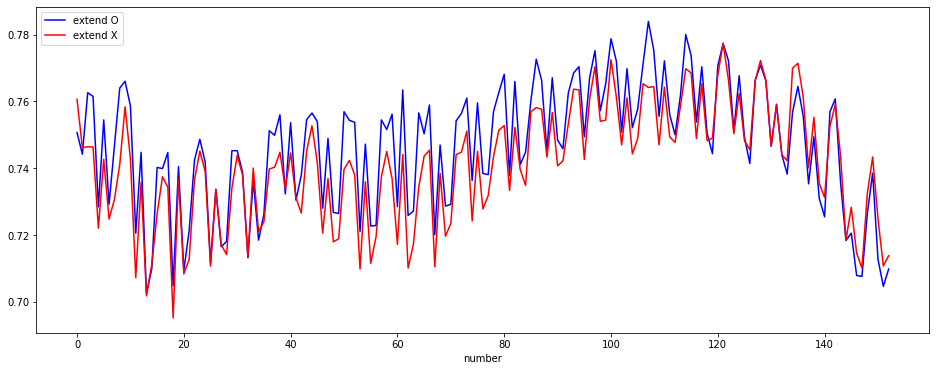

In [201]:
plt.figure(figsize = (16,6))
answer_rate_groupY.plot(color = 'blue', label = "extend O")
answer_rate_groupN.plot(color = 'red', label = 'extend X')
plt.legend(loc = 'upper left')

In [213]:
CALH_0307_학습시간 = CALH_0307['학습 시간'].groupby(CALH_0307['학생구분']).sum()
CFLH_0307_학습시간 = CFLH_0307['학습 시간'].groupby(CFLH_0307['학생구분']).sum()
CPEH_0307_학습시간 = CPEH_0307['학습 시간'].groupby(CPEH_0307['학생구분']).sum()
CPH_0307_학습시간 = CPH_0307['학습 시간'].groupby(CPH_0307['학생구분']).sum()

In [215]:
stu_num = []
for i in range(0, 105000):
    stu_num = stu_num + ['STU_%s'%i]
train_0307 = pd.DataFrame(index = stu_num)
train_0307.index.names = ['학생구분']

In [219]:
train_0307 = pd.merge(train_0307, CPEH_0307_학습시간, on = '학생구분', how = 'outer')
train_0307 = pd.merge(train_0307, CALH_0307_학습시간, on = '학생구분', how = 'outer')
train_0307 = pd.merge(train_0307, CFLH_0307_학습시간, on = '학생구분', how = 'outer')
train_0307 = pd.merge(train_0307, CPH_0307_학습시간, on = '학생구분', how = 'outer')
train_0307.columns = ['CPEH_학습시간', 'CALH_학습시간', 'CFLH_학습시간','CPH_학습시간']

ValueError: Length mismatch: Expected axis has 8 elements, new values have 4 elements

In [233]:
CALH_0307_EXTEND = pd.merge(CALH_0307, EXT_REC_0307_B, on = '학생구분')
CFLH_0307_EXTEND = pd.merge(CFLH_0307, EXT_REC_0307_B, on = '학생구분')
CPEH_0307_EXTEND = pd.merge(CPEH_0307, EXT_REC_0307_B, on = '학생구분')
CPH_0307_EXTEND = pd.merge(CPH_0307, EXT_REC_0307_B, on = '학생구분')

CALH_0307_EXTEND = pd.merge(CALH_0307_EXTEND, date_0307, on = 'DT')
CFLH_0307_EXTEND = pd.merge(CFLH_0307_EXTEND, date_0307, on = 'DT')
CPEH_0307_EXTEND = pd.merge(CPEH_0307_EXTEND, date_0307, on = 'DT')
CPH_0307_EXTEND = pd.merge(CPH_0307_EXTEND, date_0307, on = 'DT')


In [303]:
CALH_0307_EXTEND_Y = CALH_0307_EXTEND[CALH_0307_EXTEND['연장회원구분']=='Y']
CALH_0307_EXTEND_N = CALH_0307_EXTEND[CALH_0307_EXTEND['연장회원구분']=='N']

CFLH_0307_EXTEND_Y = CFLH_0307_EXTEND[CFLH_0307_EXTEND['연장회원구분']=='Y']
CFLH_0307_EXTEND_N = CFLH_0307_EXTEND[CFLH_0307_EXTEND['연장회원구분']=='N']

CPEH_0307_EXTEND_Y = CPEH_0307_EXTEND[CPEH_0307_EXTEND['연장회원구분']=='Y']
CPEH_0307_EXTEND_N = CPEH_0307_EXTEND[CPEH_0307_EXTEND['연장회원구분']=='N']

CPH_0307_EXTEND_Y = CPH_0307_EXTEND[CPH_0307_EXTEND['연장회원구분']=='Y']
CPH_0307_EXTEND_N = CPH_0307_EXTEND[CPH_0307_EXTEND['연장회원구분']=='N']

In [304]:
CALH_0307_EXTEND_Y_merge = CALH_0307_EXTEND_Y['학습 시간'].groupby(CALH_0307_EXTEND_Y['학생구분']).sum()
CALH_0307_EXTEND_N_merge = CALH_0307_EXTEND_N['학습 시간'].groupby(CALH_0307_EXTEND_N['학생구분']).sum()

CFLH_0307_EXTEND_Y_merge = CALH_0307_EXTEND_Y['학습 시간'].groupby(CALH_0307_EXTEND_Y['학생구분']).sum()
CFLH_0307_EXTEND_Y_merge = CALH_0307_EXTEND_N['학습 시간'].groupby(CALH_0307_EXTEND_N['학생구분']).sum()

CPEH_0307_EXTEND_Y_merge = CPEH_0307_EXTEND_Y['학습 시간'].groupby(CPEH_0307_EXTEND_Y['학생구분']).sum()
CPEH_0307_EXTEND_N_merge = CPEH_0307_EXTEND_N['학습 시간'].groupby(CPEH_0307_EXTEND_N['학생구분']).sum()

CPH_0307_EXTEND_Y_merge = CPH_0307_EXTEND_Y['학습 시간'].groupby(CPH_0307_EXTEND_Y['학생구분']).sum()
CPH_0307_EXTEND_N_merge = CPH_0307_EXTEND_N['학습 시간'].groupby(CPH_0307_EXTEND_N['학생구분']).sum()

In [313]:
train_0307 = pd.merge(train_0307, EXT_REC_0307_B, on = '학생구분')

In [327]:
train_0307 = train_0307.fillna(0)

In [328]:
train_0307['총 학습시간'] = train_0307['CPEH_학습시간']+train_0307['CALH_학습시간']+train_0307['CFLH_학습시간']+train_0307['CPH_학습시간']

In [338]:
train_0307_Y = train_0307[train_0307['연장회원구분'] =='Y']
train_0307_N = train_0307[train_0307['연장회원구분'] =='N']

In [350]:
train_0307_mean = train_0307.groupby(train_0307['연장회원구분']).mean()

In [340]:
train_0307_Y['CPEH_학습시간'].mean(),train_0307_N['CPEH_학습시간'].mean()

(7976.23344140806, 13425.401100260788)

In [342]:
train_0307_Y['CALH_학습시간'].mean(),train_0307_N['CALH_학습시간'].mean()

(71284.78404353868, 63086.28618201892)

In [345]:
train_0307_Y['CFLH_학습시간'].mean(),train_0307_N['CFLH_학습시간'].mean()

(44629.10101127065, 59710.935145527576)

In [346]:
train_0307_Y['CPH_학습시간'].mean(),train_0307_N['CPH_학습시간'].mean()

(155737.28006793268, 125614.20891630022)

In [443]:
train_0307_mean.columns = [['CPEH','CALH','CFLH','CPH','ALL']]

In [445]:
Ytrain_0307 = train_0307_mean.iloc[1,:4]
Ntrain_0307 = train_0307_mean.iloc[0,:4]

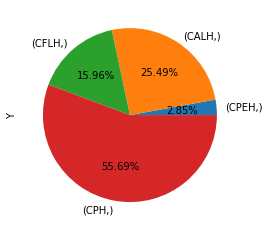

In [447]:
Ytrain_0307.plot.pie(autopct = '%.2f%%')

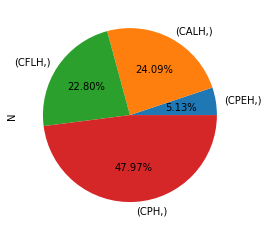

In [448]:
Ntrain_0307.plot.pie(autopct = '%.2f%%')

In [455]:
train_0307

,학생구분,CPEH_학습시간,CALH_학습시간,CFLH_학습시간,CPH_학습시간,연장회원구분,총 학습시간
0,STU_0,0.0,233.0,1980.0,0.0,N,2213.0
1,STU_1,0.0,2206.0,0.0,0.0,N,2206.0
2,STU_2,0.0,0.0,0.0,0.0,N,0.0
3,STU_3,0.0,283.0,884.0,610.0,N,1777.0
4,STU_4,0.0,0.0,0.0,0.0,N,0.0
...,...,...,...,...,...,...,...
78436,STU_98085,0.0,0.0,4438.0,3591.0,N,8029.0
78437,STU_98086,0.0,0.0,0.0,1130.0,N,1130.0
78438,STU_98087,0.0,0.0,0.0,1771.0,N,1771.0
78439,STU_98088,300.0,1651.0,102.0,6336.0,N,8389.0


In [460]:
evaluation_0307['정답률']=evaluation_0307['정답 수'] / evaluation_0307['문제 수']

In [470]:
answerrate = evaluation_0307[['학생구분', '정답률']]

In [475]:
answerrate = answerrate.dropna()

In [477]:
answerrate_mean = answerrate['정답률'].groupby(answerrate['학생구분']).mean()

In [508]:
t_0307 = pd.merge(answerrate_mean, train_0307, on = '학생구분')

In [501]:
Nt_0307 = t_0307[t_0307['연장회원구분']=='N']
Yt_0307 = t_0307[t_0307['연장회원구분']=='Y']

In [509]:
tt_0307 = t_0307[['정답률', 'CPH_학습시간']]

In [525]:
Yt_0307 = Yt_0307[['정답률', 'CPH_학습시간']]
Nt_0307 = Nt_0307[['정답률', 'CPH_학습시간']]

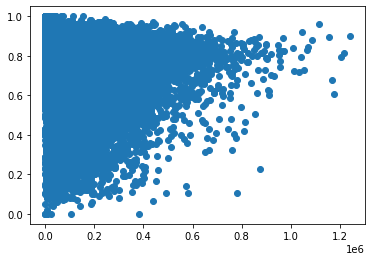

In [503]:
plt.plot('CPH_학습시간','정답률',data = Yt_0307, marker = 'o', linestyle = 'none')

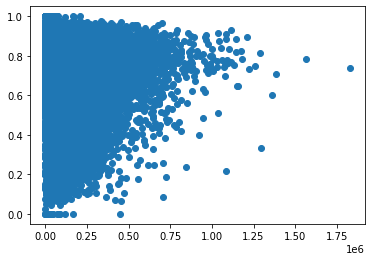

In [504]:
plt.plot('CPH_학습시간','정답률',data = Nt_0307, marker = 'o', linestyle = 'none')

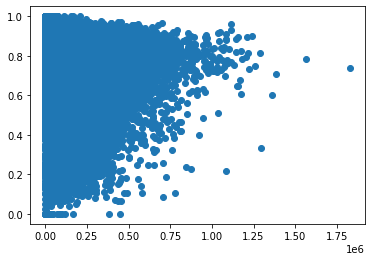

In [495]:
plt.plot('CPH_학습시간','정답률',data = t_0307, marker = 'o', linestyle = 'none')

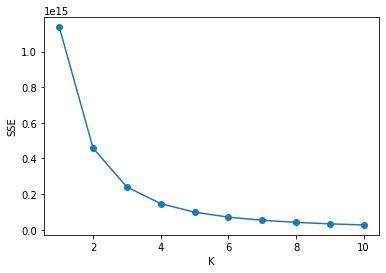

In [511]:

def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters = i , algorithm = 'auto', random_state = 42)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker = 'o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()
elbow(tt_0307)

In [514]:
model = KMeans(n_clusters=4,algorithm='auto')
model.fit(tt_0307)
predict = pd.DataFrame(model.predict(tt_0307))
predict.columns=['predict']

In [534]:
model = KMeans(n_clusters=4,algorithm='auto')
model.fit(Yt_0307)
Ypredict = pd.DataFrame(model.predict(Yt_0307))
Ypredict.columns=['predict']

In [536]:
model = KMeans(n_clusters=4,algorithm='auto')
model.fit(Nt_0307)
Npredict = pd.DataFrame(model.predict(Nt_0307))
Npredict.columns=['predict']

In [531]:
predict

,Npredict
0,0
1,1
2,2
3,0
4,2
...,...
74378,0
74379,2
74380,1
74381,0


In [516]:
tt_0307

,정답률,CPH_학습시간
0,0.964286,3944.0
1,0.756490,281221.0
2,0.821732,133990.0
3,0.841538,63883.0
4,0.851660,128667.0
...,...,...
74378,0.905982,92587.0
74379,0.778646,142425.0
74380,0.492817,345962.0
74381,0.723016,4124.0


In [519]:
final_df = pd.concat([tt_0307, predict] , axis = 1)

In [537]:
Yfinal_df = pd.concat([Yt_0307, Ypredict], axis =1)

In [538]:
Nfinal_df = pd.concat([Nt_0307, Npredict], axis =1)

In [520]:
final_df

,정답률,CPH_학습시간,predict
0,0.964286,3944.0,0
1,0.756490,281221.0,2
2,0.821732,133990.0,1
3,0.841538,63883.0,0
4,0.851660,128667.0,1
...,...,...,...
74378,0.905982,92587.0,0
74379,0.778646,142425.0,1
74380,0.492817,345962.0,2
74381,0.723016,4124.0,0


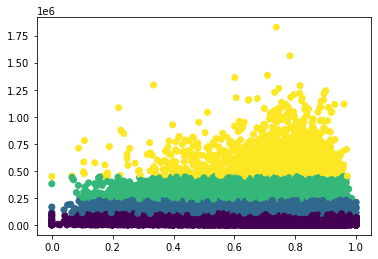

In [524]:
xs = final_df.iloc[:,0]
ys = final_df.iloc[:,1]
plt.scatter(xs, ys, c = final_df['predict'])

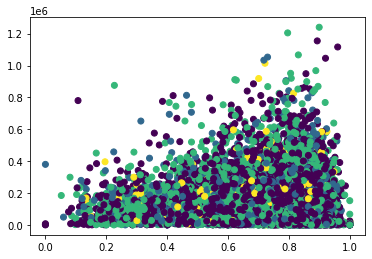

In [539]:
xs = Yfinal_df.iloc[:,0]
ys = Yfinal_df.iloc[:,1]
plt.scatter(xs, ys, c = Yfinal_df['predict'])

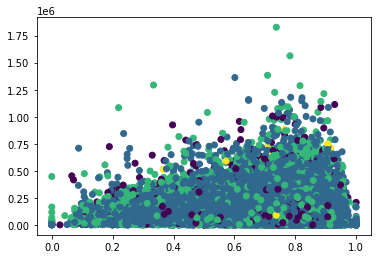

In [540]:
xs = Nfinal_df.iloc[:,0]
ys = Nfinal_df.iloc[:,1]
plt.scatter(xs, ys, c = Nfinal_df['predict'])